In [26]:
import geopandas as gpd
import numpy as np
import pandas as pd
from glob import glob
from modules.Base import BaseModule

class GreenAreas(BaseModule):
    def __init__(self) -> None:
        super().__init__()
        self.cols = ['ID_AV', 'ID_PLACA', 'geometry']
        self.scenarios_status = [0]*self.num_plates
        self.load_data()
        pass

    def load_data(self):
        self.scenarios = []
        [self.scenarios.append(gpd.read_file(file)[self.cols].to_crs(self.default_crs)) for file in glob('/app/assets/green_areas/*')]
        [gdf['ID_PLACA'].fillna(0, inplace=True) for gdf in self.scenarios];
        self.current_scenario = self.scenarios[0]
        pass

    def update_plate_area(self, plate_id, scenario_id):
        mask = self.current_scenario['ID_PLACA'] == plate_id
        self.current_scenario = self.current_scenario[~mask]

        new_scenario = self.scenarios[scenario_id]
        mask = new_scenario['ID_PLACA'] == plate_id
        new_scenario = new_scenario[mask]
        
        self.current_scenario = pd.concat([self.current_scenario, new_scenario])
        pass

    def get_green_areas_ids(self):
        return list(self.current_scenario['ID_AV'].unique())
    
    def get_green_area_by_id(self, green_area_id):
        mask = (self.current_scenario['ID_AV'] == green_area_id)
        return self.current_scenario[mask]
    
    def get_countour_by_id(self, green_area_id):
        return list(self.get_green_area_by_id(green_area_id)['geometry'].exterior[0].coords)

In [27]:
ga = GreenAreas()

In [28]:
ga.get_countour_by_id(1)

[(673997.1377999997, 5921797.3351, 0.0),
 (674412.4982000003, 5920978.2031, 0.0),
 (674411.1849999996, 5920977.1186, 0.0),
 (674376.1286000004, 5920953.7357, 0.0),
 (674360.6615000004, 5920937.6277, 0.0),
 (674351.3981999997, 5920933.1728, 0.0),
 (674321.7556999996, 5920928.3699, 0.0),
 (674309.2834999999, 5920912.9194, 0.0),
 (673952.4184999997, 5920741.2991, 0.0),
 (673946.4266999997, 5920758.4734, 0.0),
 (673936.3784999996, 5920776.6978, 0.0),
 (673901.0323000001, 5920774.1242, 0.0),
 (673882.9080999997, 5920765.669, 0.0),
 (673855.1259000003, 5920756.2222, 0.0),
 (673837.0016999999, 5920747.767, 0.0),
 (673812.8063000003, 5920744.4916, 0.0),
 (673800.1627000002, 5920746.8866, 0.0),
 (673767.2005000003, 5920731.3686, 0.0),
 (673739.8191999998, 5920728.2938, 0.0),
 (673717.4282, 5920753.692, 0.0),
 (673706.8788000001, 5920763.9516, 0.0),
 (673694.1350999996, 5920764.7535, 0.0),
 (673669.5389, 5920755.1063, 0.0),
 (673657.7866000002, 5920746.2501, 0.0),
 (673640.6648000004, 5920753.72

<Axes: >

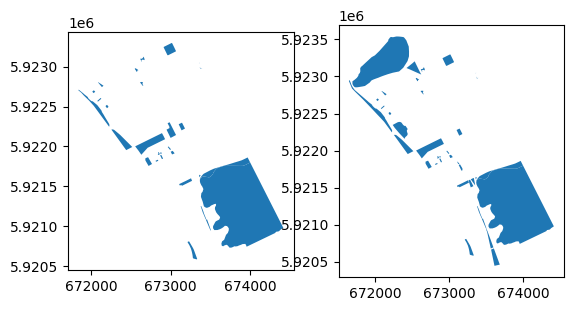

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ga.current.plot(ax = ax[0])
# ga.scenarios[0].plot(ax = ax[0])
ga.update_plate_area(plate_id=0, scenario_id=1)
ga.current.plot(ax = ax[1])
# ga.scenarios[1].plot(ax = ax[1])

In [7]:
from shapely.geometry import Polygon
gdf = ga.current
# for idx, row in gdf.iterrows():
#     polygon = row['geometry']
#     if isinstance(polygon, Polygon):  # Asegúrate de que estés tratando con polígonos, no con geometrías multipolígonos
#         contour = list(polygon.exterior.coords)
#         gdf.at[idx, 'contorno'] = contour


In [11]:
for coord in gdf.loc[0, 'geometry'].exterior.coords:
    print(coord)

(673997.1377999997, 5921797.3351, 0.0)
(674412.4982000003, 5920978.2031, 0.0)
(674411.1849999996, 5920977.1186, 0.0)
(674376.1286000004, 5920953.7357, 0.0)
(674360.6615000004, 5920937.6277, 0.0)
(674351.3981999997, 5920933.1728, 0.0)
(674321.7556999996, 5920928.3699, 0.0)
(674309.2834999999, 5920912.9194, 0.0)
(673952.4184999997, 5920741.2991, 0.0)
(673946.4266999997, 5920758.4734, 0.0)
(673936.3784999996, 5920776.6978, 0.0)
(673901.0323000001, 5920774.1242, 0.0)
(673882.9080999997, 5920765.669, 0.0)
(673855.1259000003, 5920756.2222, 0.0)
(673837.0016999999, 5920747.767, 0.0)
(673812.8063000003, 5920744.4916, 0.0)
(673800.1627000002, 5920746.8866, 0.0)
(673767.2005000003, 5920731.3686, 0.0)
(673739.8191999998, 5920728.2938, 0.0)
(673717.4282, 5920753.692, 0.0)
(673706.8788000001, 5920763.9516, 0.0)
(673694.1350999996, 5920764.7535, 0.0)
(673669.5389, 5920755.1063, 0.0)
(673657.7866000002, 5920746.2501, 0.0)
(673640.6648000004, 5920753.7247, 0.0)
(673635.8968000002, 5920779.6132, 0.0)
(